In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [2]:
!pip install catboost

In [3]:
url = 'ds2019.csv'
df =pd.read_csv(url,encoding='ISO-8859-1')

C:\Users\shevy\AppData\Local\Temp\ipykernel_21936\4134795348.py:2: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(url,encoding='ISO-8859-1')


In [4]:
df.head()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(34), int64(79), object(8)
memory usage: 10.0+ MB


In [6]:
df.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [7]:
X = df.drop(['TOTALDOL','TOTALDOLSPH','TOTALDOLCOL','TOTALDOLWTH','TOTALDOLOTH'],axis=1)
y = df['TOTALDOL']


In [12]:
from sklearn.impute import SimpleImputer
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values:", non_numeric_cols)
df[non_numeric_cols] = df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')


imputer = SimpleImputer(strategy='mean') 
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


remaining_non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Columns with remaining non-numeric values:", remaining_non_numeric_cols)


scaler = StandardScaler()
X = scaler.fit_transform(df)

X = scaler.fit_transform(X)

Columns with non-numeric values: Index([], dtype='object')
Columns with remaining non-numeric values: Index([], dtype='object')


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
from catboost import CatBoostRegressor

# Создание и обучение модели CatBoost
catboost_model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')
catboost_model.fit(X_train, y_train)


0:	learn: 1113.3714176	total: 346ms	remaining: 2m 52s
1:	learn: 1066.3257481	total: 527ms	remaining: 2m 11s
2:	learn: 1023.0728899	total: 695ms	remaining: 1m 55s
3:	learn: 983.3528872	total: 863ms	remaining: 1m 47s
4:	learn: 946.0571097	total: 1.02s	remaining: 1m 41s
5:	learn: 905.8851770	total: 1.21s	remaining: 1m 39s
6:	learn: 869.9959159	total: 1.38s	remaining: 1m 37s
7:	learn: 834.8591835	total: 1.54s	remaining: 1m 34s
8:	learn: 800.9019771	total: 1.71s	remaining: 1m 33s
9:	learn: 769.2688206	total: 1.88s	remaining: 1m 32s
10:	learn: 737.6505536	total: 2.04s	remaining: 1m 30s
11:	learn: 708.0775640	total: 2.21s	remaining: 1m 29s
12:	learn: 682.3650996	total: 2.38s	remaining: 1m 29s
13:	learn: 656.8055597	total: 2.55s	remaining: 1m 28s
14:	learn: 630.6009361	total: 2.71s	remaining: 1m 27s
15:	learn: 605.0414517	total: 2.87s	remaining: 1m 26s
16:	learn: 580.7788782	total: 3.04s	remaining: 1m 26s
17:	learn: 557.0199486	total: 3.21s	remaining: 1m 26s
18:	learn: 534.4119545	total: 3.38s

156:	learn: 43.0815351	total: 26.2s	remaining: 57.3s
157:	learn: 42.8826480	total: 26.4s	remaining: 57.1s
158:	learn: 42.5512796	total: 26.5s	remaining: 56.9s
159:	learn: 42.3554602	total: 26.7s	remaining: 56.8s
160:	learn: 42.0251236	total: 26.9s	remaining: 56.6s
161:	learn: 41.8224507	total: 27s	remaining: 56.4s
162:	learn: 41.7606470	total: 27.2s	remaining: 56.2s
163:	learn: 41.4919793	total: 27.3s	remaining: 56s
164:	learn: 41.4370176	total: 27.5s	remaining: 55.8s
165:	learn: 41.3843829	total: 27.7s	remaining: 55.7s
166:	learn: 41.1442046	total: 27.8s	remaining: 55.5s
167:	learn: 40.8863516	total: 28s	remaining: 55.3s
168:	learn: 40.8391277	total: 28.1s	remaining: 55s
169:	learn: 40.5287134	total: 28.2s	remaining: 54.8s
170:	learn: 40.2143395	total: 28.4s	remaining: 54.7s
171:	learn: 40.0473463	total: 28.6s	remaining: 54.5s
172:	learn: 39.8398169	total: 28.7s	remaining: 54.3s
173:	learn: 39.6793006	total: 28.9s	remaining: 54.2s
174:	learn: 39.4485375	total: 29.1s	remaining: 54s
175

313:	learn: 25.2075171	total: 51.9s	remaining: 30.7s
314:	learn: 25.1474079	total: 52s	remaining: 30.6s
315:	learn: 25.0866336	total: 52.2s	remaining: 30.4s
316:	learn: 24.9818819	total: 52.4s	remaining: 30.2s
317:	learn: 24.9091340	total: 52.6s	remaining: 30.1s
318:	learn: 24.8534635	total: 52.7s	remaining: 29.9s
319:	learn: 24.7931054	total: 52.9s	remaining: 29.7s
320:	learn: 24.6991724	total: 53s	remaining: 29.6s
321:	learn: 24.6251707	total: 53.2s	remaining: 29.4s
322:	learn: 24.5558946	total: 53.4s	remaining: 29.3s
323:	learn: 24.4874314	total: 53.5s	remaining: 29.1s
324:	learn: 24.4118706	total: 53.7s	remaining: 28.9s
325:	learn: 24.3547787	total: 53.9s	remaining: 28.8s
326:	learn: 24.2791526	total: 54s	remaining: 28.6s
327:	learn: 24.2262503	total: 54.2s	remaining: 28.4s
328:	learn: 24.1773435	total: 54.4s	remaining: 28.3s
329:	learn: 24.1196283	total: 54.5s	remaining: 28.1s
330:	learn: 24.0439403	total: 54.7s	remaining: 27.9s
331:	learn: 23.9580991	total: 54.9s	remaining: 27.8s

469:	learn: 17.2185580	total: 1m 17s	remaining: 4.96s
470:	learn: 17.1789494	total: 1m 17s	remaining: 4.79s
471:	learn: 17.1183658	total: 1m 18s	remaining: 4.63s
472:	learn: 17.0830369	total: 1m 18s	remaining: 4.46s
473:	learn: 17.0533013	total: 1m 18s	remaining: 4.3s
474:	learn: 17.0267585	total: 1m 18s	remaining: 4.13s
475:	learn: 16.9821322	total: 1m 18s	remaining: 3.97s
476:	learn: 16.9413158	total: 1m 18s	remaining: 3.8s
477:	learn: 16.9059018	total: 1m 19s	remaining: 3.63s
478:	learn: 16.8653653	total: 1m 19s	remaining: 3.47s
479:	learn: 16.8345822	total: 1m 19s	remaining: 3.31s
480:	learn: 16.7947256	total: 1m 19s	remaining: 3.14s
481:	learn: 16.7721718	total: 1m 19s	remaining: 2.97s
482:	learn: 16.7360714	total: 1m 19s	remaining: 2.81s
483:	learn: 16.7064167	total: 1m 19s	remaining: 2.64s
484:	learn: 16.6703272	total: 1m 20s	remaining: 2.48s
485:	learn: 16.6278994	total: 1m 20s	remaining: 2.31s
486:	learn: 16.5961389	total: 1m 20s	remaining: 2.15s
487:	learn: 16.5468897	total: 

In [16]:
feature_names = df.columns

feature_importance = catboost_model.feature_importances_

threshold = 0.1 
important_features = feature_names[feature_importance > threshold]

important_feature_indices = [list(df.columns).index(feature) for feature in important_features]
print(len(important_feature_indices))

# Use only important features
X_train_important = X_train[:, important_feature_indices]
X_val_important = X_val[:, important_feature_indices]
X_test_important = X_test[:, important_feature_indices]

47


In [17]:
from keras.models import Sequential
from keras.layers import Dense
regressor = Sequential()
regressor.add(Dense(32,activation='relu',input_dim=X_train_important.shape[1]))
regressor.add(Dense(8))
regressor.add(Dense(1))

In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1536      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1809 (7.07 KB)
Trainable params: 1809 (7.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
regressor.compile(loss='mse',optimizer='adam',metrics='mae')

In [20]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_mae',patience=20,mode='min',verbose=1)
checkpoint = ModelCheckpoint('lab1_3_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
                              monitor='val_loss',verbose=1,mode='min',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [21]:
regressor_history = regressor.fit(X_train_important, y_train, batch_size=140,
                      validation_data=(X_val_important,y_val), callbacks=callbacks_list, epochs=100)

Epoch 1/100
191/191 [==============================] - ETA: 0s - loss: 5399974.0000 - mae: 2021.7429
Epoch 1: val_loss improved from inf to 4882789.00000, saving model to lab1_3_weights-01-4882789.000.hdf5
191/191 [==============================] - 2s 4ms/step - loss: 5399974.0000 - mae: 2021.7429 - val_loss: 4882789.0000 - val_mae: 1954.8452
Epoch 2/100
 70/191 [=========>....................] - ETA: 0s - loss: 4857284.0000 - mae: 1928.1327

C:\Users\shevy\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/191 [============================>.] - ETA: 0s - loss: 4088917.2500 - mae: 1785.9938
Epoch 2: val_loss improved from 4882789.00000 to 2683721.50000, saving model to lab1_3_weights-02-2683721.500.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 4074081.5000 - mae: 1783.1772 - val_loss: 2683721.5000 - val_mae: 1499.7716
Epoch 3/100
170/191 [=========================>....] - ETA: 0s - loss: 1800217.5000 - mae: 1194.2983
Epoch 3: val_loss improved from 2683721.50000 to 1265673.87500, saving model to lab1_3_weights-03-1265673.875.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 1746069.5000 - mae: 1172.4264 - val_loss: 1265673.8750 - val_mae: 974.7527
Epoch 4/100
170/191 [=========================>....] - ETA: 0s - loss: 1069345.6250 - mae: 875.6106
Epoch 4: val_loss improved from 1265673.87500 to 896605.62500, saving model to lab1_3_weights-04-896605.625.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 1051425.6250 - mae: 864.098

Epoch 26/100
186/191 [============================>.] - ETA: 0s - loss: 29390.7695 - mae: 117.8921
Epoch 26: val_loss improved from 28424.18945 to 26619.38867, saving model to lab1_3_weights-26-26619.389.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 29306.8223 - mae: 118.0028 - val_loss: 26619.3887 - val_mae: 116.2647
Epoch 27/100
187/191 [============================>.] - ETA: 0s - loss: 26951.8574 - mae: 112.5101
Epoch 27: val_loss improved from 26619.38867 to 23909.10938, saving model to lab1_3_weights-27-23909.109.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 26875.5078 - mae: 112.3798 - val_loss: 23909.1094 - val_mae: 108.5244
Epoch 28/100
185/191 [============================>.] - ETA: 0s - loss: 24669.2188 - mae: 107.0346
Epoch 28: val_loss improved from 23909.10938 to 22763.98438, saving model to lab1_3_weights-28-22763.984.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 24672.4375 - mae: 106.8564 - val_loss: 22763

191/191 [==============================] - 1s 3ms/step - loss: 5712.4536 - mae: 48.0259 - val_loss: 5874.3599 - val_mae: 48.3264
Epoch 51/100
189/191 [============================>.] - ETA: 0s - loss: 5513.0796 - mae: 47.6069
Epoch 51: val_loss improved from 5874.35986 to 5422.92139, saving model to lab1_3_weights-51-5422.921.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 5503.9590 - mae: 47.6084 - val_loss: 5422.9214 - val_mae: 45.9326
Epoch 52/100
170/191 [=========================>....] - ETA: 0s - loss: 5034.3086 - mae: 44.9403
Epoch 52: val_loss improved from 5422.92139 to 5222.94092, saving model to lab1_3_weights-52-5222.941.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 4948.1401 - mae: 44.7332 - val_loss: 5222.9409 - val_mae: 44.7794
Epoch 53/100
189/191 [============================>.] - ETA: 0s - loss: 4686.8682 - mae: 43.2787
Epoch 53: val_loss improved from 5222.94092 to 4905.06982, saving model to lab1_3_weights-53-4905.070.hdf5
1

189/191 [============================>.] - ETA: 0s - loss: 1186.9034 - mae: 20.9677
Epoch 75: val_loss improved from 1456.90637 to 1334.97400, saving model to lab1_3_weights-75-1334.974.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 1187.5334 - mae: 20.9942 - val_loss: 1334.9740 - val_mae: 21.3781
Epoch 76/100
188/191 [============================>.] - ETA: 0s - loss: 1111.4191 - mae: 20.3715
Epoch 76: val_loss improved from 1334.97400 to 1329.07275, saving model to lab1_3_weights-76-1329.073.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 1114.5764 - mae: 20.3741 - val_loss: 1329.0728 - val_mae: 20.3216
Epoch 77/100
189/191 [============================>.] - ETA: 0s - loss: 1049.6046 - mae: 19.4568
Epoch 77: val_loss improved from 1329.07275 to 1143.00769, saving model to lab1_3_weights-77-1143.008.hdf5
191/191 [==============================] - 1s 3ms/step - loss: 1046.1278 - mae: 19.4351 - val_loss: 1143.0077 - val_mae: 19.3655
Epoch 78/100
1

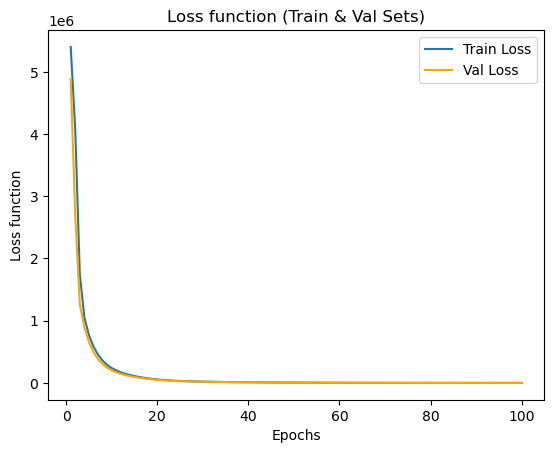

In [22]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

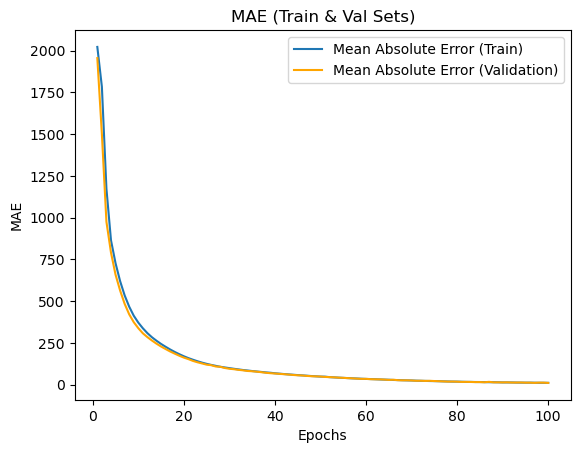

In [23]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs,mae,label='Mean Absolute Error (Train)')
plt.plot(epochs,val_mae,color='orange',label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [24]:
results = regressor.evaluate(X_test_important,y_test)

51/51 [==============================] - 0s 2ms/step - loss: 538.5673 - mae: 10.9875


In [25]:
y_test

6112     2419
10754    3029
2184     1311
5849     1542
9539     3233
         ... 
2013     1695
1952     2127
3251      983
8072     2909
10769    1995
Name: TOTALDOL, Length: 1632, dtype: int64

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Оценки модели CatBoostRegressor
y_catboost_pred = catboost_model.predict(X_test)

mse_catboost = mean_squared_error(y_test, y_catboost_pred)
mae_catboost = mean_absolute_error(y_test, y_catboost_pred)
r2_catboost = r2_score(y_test, y_catboost_pred)

# Оценки нейронной сети
y_nn_pred = regressor.predict(X_test_important)

mse_nn = mean_squared_error(y_test, y_nn_pred)
mae_nn = mean_absolute_error(y_test, y_nn_pred)
r2_nn = r2_score(y_test, y_nn_pred)

# Создание таблицы с метриками
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': ['CatBoost', 'Neural Network'],
    'MSE': [mse_catboost, mse_nn],
    'MAE': [mae_catboost, mae_nn],
    'R2': [r2_catboost, r2_nn]
})

# Отображение таблицы метрик
print(metrics_df)


51/51 [==============================] - 0s 2ms/step
            Model            MSE        MAE        R2
0        CatBoost  409090.933722  44.287498  0.787363
1  Neural Network     538.567091  10.987491  0.999720
